In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.python.client import device_lib
import util
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle

In [6]:
# file_name = 'C:/Users/Robert/git/visibility_NN/main_data_file_courses1/model_1/model_1_results.pkl'
# file_name = "H:/My Drive/nn_model_results/main_data_file_courses1/model_1/model_1_results.pkl"
# file_name = "H:/My Drive/nn_model_results/23_04_20/main_data_file_courses2/model_1/model_1_results.pkl"
file_name = "H:/My Drive/nn_model_results/23_04_20/main_data_file_courses1/model_1/model_1_results.pkl"
# file_name = './model_1_results.pkl'
results = pickle.load(open(file_name,'rb'))
results.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [7]:
def plot_hist(results, x_start = 0, x_end = len(results['accuracy']), logscale = 1):
    metric = results['accuracy']
    val_metric = results['val_accuracy']
    loss = results['loss']
    val_loss = results['val_loss']
    if logscale == 1:
        # only for loss
        loss = np.log10(loss)
        val_loss = np.log10(val_loss)

    epochs = range(len(metric))

    (width, height) = (16, 4)
    fig = plt.figure(figsize = (width, height))

    plt.rc('font', size=15)          # controls default text sizes
    plt.rc('axes', titlesize=15)     # fontsize of the axes title
    plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
    plt.rc('legend', fontsize=15)    # legend fontsize
    plt.rc('figure', titlesize=15)  # fontsize of the figure title
    
    (n_row, n_col) = (1, 2)
    gs = GridSpec(n_row, n_col)

    ax = fig.add_subplot(gs[0])
    plt.plot(epochs, loss, 'b-', label='Training Loss', linewidth = 3)
    plt.plot(epochs, val_loss, 'r--', label='Validation Loss', linewidth = 2)
    if logscale == 1:
        plt.title('Log$_{10}$(Loss) vs. Epochs', fontweight='bold')
    else:
        plt.title('Loss vs. Epochs', fontweight='bold')
    ax.set_xlim(x_start, x_end)
    plt.legend()    
    
    ax = fig.add_subplot(gs[1])
    plt.plot(epochs, metric, 'b-', label='Training Accuracy', linewidth = 3)
    plt.plot(epochs, val_metric, 'r--', label='Validation Accuracy', linewidth = 2)
    plt.title('Accuracy vs. Epochs', fontweight='bold')  
    ax.set_xlim(x_start, x_end)
    plt.legend() 

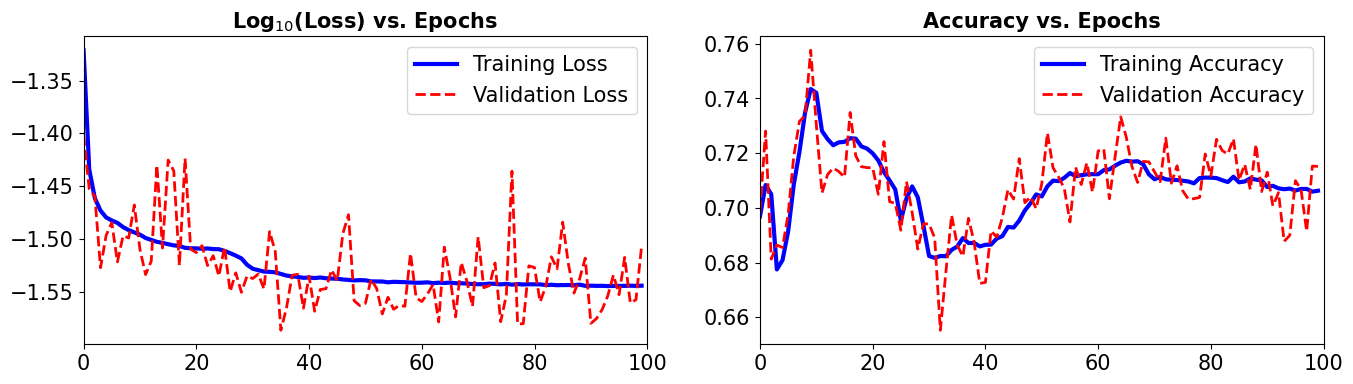

In [8]:
plot_hist(results)

In [11]:
model_predict = K.models.load_model('H:/My Drive/nn_model_results/23_04_16/main_data_file_courses1/model_1_keras_model')

In [15]:
model_predict.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
Total params: 792
Trainable params: 792
Non-trainable params: 0
_________________________________________________________________


In [18]:
type(model_predict.history)

NoneType